In [780]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [781]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [782]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [783]:
# считаем все-все данные
%matplotlib inline

In [784]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [785]:
train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [786]:
train.shape

(15223, 52)

In [ ]:

train[train['TARGET'] == 1].count()

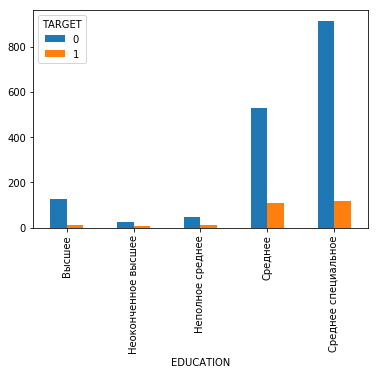

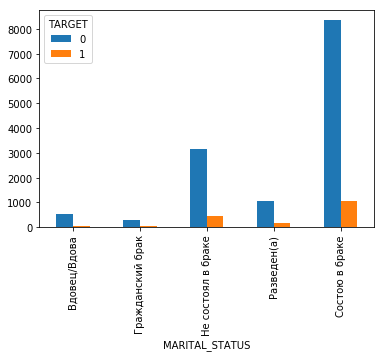

In [788]:


train[(train['GEN_TITLE'] == 'Рабочий') & (train['MARITAL_STATUS'] == 'Состою в браке')].pivot_table(values='AGREEMENT_RK', index=['EDUCATION'], columns=['TARGET'], aggfunc='count').plot(kind='bar')
train.pivot_table(values='AGREEMENT_RK', index=['MARITAL_STATUS'], columns=['TARGET'], aggfunc='count').plot(kind='bar')


In [789]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [790]:
test.shape

(14910, 51)

In [791]:
# отделим таргет от TRAIN-а

In [792]:
y = train['TARGET']

In [793]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       1
12       1
13       0
14       0
15       1
16       0
17       0
18       1
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
15193    0
15194    0
15195    0
15196    0
15197    0
15198    0
15199    0
15200    1
15201    0
15202    0
15203    0
15204    1
15205    0
15206    0
15207    0
15208    0
15209    1
15210    0
15211    0
15212    0
15213    1
15214    0
15215    0
15216    0
15217    0
15218    0
15219    0
15220    0
15221    0
15222    0
Name: TARGET, Length: 15223, dtype: int64

In [794]:
train = train.drop('TARGET', axis=1)

In [795]:
# соеденим train и test

In [796]:
all_data = pd.concat([train, test])

In [894]:
all_data.shape

(30133, 51)

In [797]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [798]:
# посмотрим типы данных и их заполняемость

In [799]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [800]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [801]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Высшее', 'Неполное среднее', 'Среднее'}

MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'Строительство', 'Информационные технологии', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Салоны красоты и здоровья', 'Другие сферы', 'Недвижимость', 'Наука', 'Нефтегазовая промышленность', 'Образование', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Туризм', 'Государственная служба', 'Сборочные производства', 'Информационные услуги', 'Страхование', 'СМИ/Реклама/PR-агенства', 'Банк/Финансы', 'Сельское хозяйство', 'Транспорт', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Энергетика', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Торговля'}

GEN_TITLE
{na

In [802]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [803]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [804]:
# причина же что использовалась запятая для разделения не целой части числа

In [805]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [806]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались


In [807]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Высшее', 'Неполное среднее', 'Среднее'}

MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'Строительство', 'Информационные технологии', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Салоны красоты и здоровья', 'Другие сферы', 'Недвижимость', 'Наука', 'Нефтегазовая промышленность', 'Образование', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Туризм', 'Государственная служба', 'Сборочные производства', 'Информационные услуги', 'Страхование', 'СМИ/Реклама/PR-агенства', 'Банк/Финансы', 'Сельское хозяйство', 'Транспорт', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Энергетика', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Торговля'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [808]:
# Есть ли пропуски в данных? что с ними сделать?
# Пропуски есть GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, TP_PROVINCE, WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED
#Ваш код :-)
# 
# print(set(all_data['WORK_TIME']))

#удалим столбец 
all_data.WORK_TIME[all_data.WORK_TIME.isnull()] = all_data.WORK_TIME.fillna(0)

C:\Users\Maksim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [809]:
all_data.WORK_TIME = all_data.WORK_TIME.astype('int')

In [810]:
[x for x in all_data.columns if str(all_data[x].dtype) == 'object']

['EDUCATION',
 'MARITAL_STATUS',
 'GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'FAMILY_INCOME',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'REGION_NM']

In [811]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [812]:
label_encoder = LabelEncoder()

all_data['EDUCATION'] = label_encoder.fit_transform(all_data['EDUCATION'])

In [813]:
label_encoder.fit_transform(all_data['GEN_INDUSTRY'][~all_data.JOB_DIR.isnull()])

array([23, 23,  4, ..., 23,  9, 20], dtype=int64)

In [814]:
all_data['GEN_INDUSTRY'][~all_data.GEN_INDUSTRY.isnull()] = label_encoder.fit_transform(all_data['GEN_INDUSTRY'][~all_data.GEN_INDUSTRY.isnull()])

C:\Users\Maksim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [815]:
all_data.GEN_INDUSTRY[all_data.GEN_INDUSTRY.isnull()] = 0 # заполнение GEN_INDUSTRY NULL также можно отнести к классификации. или хотя бы заполнить для сочетания AGE + EDUCATION. Зполнить значение не получилось 

C:\Users\Maksim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [816]:
all_data.GEN_INDUSTRY = all_data.GEN_INDUSTRY.astype('int') 

In [828]:
all_data.GEN_INDUSTRY

0        23
1        23
2         4
3        13
4         1
5        23
6         2
7        20
8         3
9        13
10       13
11        2
12        9
13        1
14        1
15       23
16        0
17        6
18       22
19        9
20       13
21       23
22       24
23        3
24        9
25       23
26       23
27        2
28        2
29        0
         ..
30103    19
30104    13
30105    23
30106     0
30107     2
30108    16
30109     6
30110     3
30111    20
30112     2
30113    13
30114     2
30115    13
30116    10
30117    28
30118     0
30119    20
30120    13
30121     2
30122    16
30123     2
30124     6
30125    23
30126     2
30127     0
30128    24
30129    23
30130     9
30131     0
30132    20
Name: GEN_INDUSTRY, Length: 30133, dtype: int32

In [829]:
all_data['JOB_DIR'][~all_data.JOB_DIR.isnull()] = label_encoder.fit_transform(all_data['JOB_DIR'][~all_data.JOB_DIR.isnull()])

C:\Users\Maksim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [830]:
all_data.JOB_DIR[all_data.JOB_DIR.isnull()] = 0

C:\Users\Maksim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [831]:
all_data.JOB_DIR = all_data.JOB_DIR.astype('int') 

0        2
1        8
2        8
3        8
4        8
5        0
6        8
7        8
8        8
9        8
10       4
11       8
12       8
13       6
14       8
15       8
16       0
17       8
18       8
19       8
20       8
21       8
22       8
23       8
24       8
25       8
26       8
27       8
28       8
29       0
        ..
30103    8
30104    8
30105    2
30106    0
30107    8
30108    8
30109    2
30110    6
30111    8
30112    8
30113    8
30114    8
30115    8
30116    8
30117    8
30118    0
30119    8
30120    8
30121    8
30122    8
30123    8
30124    8
30125    8
30126    8
30127    0
30128    8
30129    8
30130    8
30131    0
30132    8
Name: JOB_DIR, Length: 30133, dtype: int32

In [834]:
# Как поступить со строковыми переменными?

# Ваш код :-)
#удаляем строковые + PREVIOUS_CARD_NUM_UTILIZED(т.к. особо роли играет и пропусков много) и AGREEMENT_RK(уникальный идентификатор)
all_data_clean = all_data.drop([x for x in all_data.columns if str(all_data[x].dtype) == 'object'] + ['PREVIOUS_CARD_NUM_UTILIZED', 'AGREEMENT_RK'],axis=1)

In [835]:
# В итоге должны получиться данные без пропусков и только числовые
train_1 = all_data_clean.iloc[:15223]

In [836]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train_1.shape


(15223, 39)

In [837]:
f = 1-y #перевернем и будем считать 1 - не откликнулся, потом обратно перевернем

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       0
12       0
13       1
14       1
15       0
16       1
17       1
18       0
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       0
28       1
29       1
        ..
15193    1
15194    1
15195    1
15196    1
15197    1
15198    1
15199    1
15200    0
15201    1
15202    1
15203    1
15204    0
15205    1
15206    1
15207    1
15208    1
15209    0
15210    1
15211    1
15212    1
15213    0
15214    1
15215    1
15216    1
15217    1
15218    1
15219    1
15220    1
15221    1
15222    1
Name: TARGET, Length: 15223, dtype: int64

In [869]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(train_1, f, test_size=0.3, random_state=42)

c = 1 - y_test



In [870]:
c

6319     0
4252     0
2323     0
6896     1
3299     0
11752    0
8139     0
4983     0
15163    0
14049    0
6348     0
6507     0
12694    1
8380     1
13480    0
3941     0
6912     0
3070     0
3706     0
9193     0
12841    0
4176     1
14123    0
3111     0
10696    0
8689     0
5357     0
11278    0
15088    1
1056     1
        ..
12627    0
7516     0
15205    0
10042    0
7573     0
4708     0
11849    0
6395     1
500      0
10539    1
11347    0
9272     0
1046     0
12229    0
2633     0
15160    0
10760    1
10255    0
11034    0
12705    0
7567     0
12526    0
5923     0
777      0
6595     0
8565     0
6088     0
4019     0
1194     0
10369    0
Name: TARGET, Length: 4567, dtype: int64

In [905]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()
rfc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
lr.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_rfc = rfc.predict(X_test)
predict_lr = lr.predict(X_test)
# Ваш код :-)


In [906]:
from sklearn.metrics import precision_score, recall_score, accuracy_score


def metrics (y_test, predict):
    return precision_score(y_test, predict), recall_score(y_test, predict), accuracy_score(y_test, predict)

# Посчитать метрики стандартные
# accuracy, precision, recall
yy_test = 1-0
precision_dtc, recall_dtc, accuracy_dtc = metrics(y_test, predict_dtc)
precision_rfc, recall_rfc, accuracy_rfc = metrics(y_test, predict_rfc)
precision_lr, recall_lr, accuracy_lr = metrics(y_test, predict_lr)

print(precision_dtc, recall_dtc, accuracy_dtc)
print(precision_rfc, recall_rfc, accuracy_rfc)
print(precision_lr, recall_lr, accuracy_lr)
# Ваш код :-)


0.885291868468 0.865653040877 0.783446463762
0.881064162754 0.982303090728 0.867965841909
0.878701469621 0.99850448654 0.87760017517


In [907]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [908]:
# Визуалиpировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)



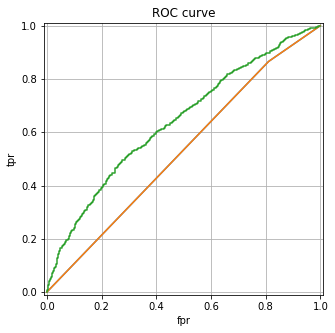

In [909]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
from sklearn.metrics import roc_auc_score, roc_curve
predict_dtc = dtc.predict_proba(X_test)
predict_rfc = rfc.predict_proba(X_test)
predict_lr = lr.predict_proba(X_test)
# Ваш код :-)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_dtc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_lr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [910]:
lr_pr = 1 - predict_lr[:,1]
dtc_pr = 1 - predict_dtc[:,1]
rfc_pr = 1 - predict_rfc[:,1]

In [911]:
print(roc_auc_score(c, lr_pr))
print(roc_auc_score(c, dtc_pr))
print(roc_auc_score(c, rfc_pr))

0.639264189414
0.527421115033
0.591550798056


In [912]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
dtc = DecisionTreeClassifier(randomstate = 42)
cross_val_score(
    dtc,
    train_1,
    f,
    scoring='roc_auc',
    cv=10
)


# Ваш код :-)

array([ 0.51647123,  0.50068425,  0.50792886,  0.49933669,  0.56444848,
        0.53741745,  0.49021922,  0.5267241 ,  0.50374298,  0.54040029])

In [913]:
rfc = RandomForestClassifier (randomstate = 42)
cross_val_score(
    rfc,
    train_1,
    f,
    scoring='roc_auc',
    cv=10
)

array([ 0.55324798,  0.58672796,  0.62937694,  0.61365724,  0.58591964,
        0.58385966,  0.52472798,  0.56989918,  0.57575776,  0.61776278])

In [914]:
lr = LogisticRegression(randomstate = 42)
cross_val_score(
    lr,
    train_1,
    f,
    scoring='roc_auc',
    cv=10
)

array([ 0.64928105,  0.61818718,  0.66235307,  0.6367599 ,  0.64943289,
        0.58367838,  0.62018532,  0.65291425,  0.63708538,  0.66391042])

In [915]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)

test = all_data_clean.iloc[15223:]

In [918]:
lr.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [930]:
predict_lr_test = lr.predict_proba(test)

In [931]:
real_predict_lr_test = 1 - predict_lr_test[:,1]

In [932]:
real_predict_lr_test

array([ 0.16041144,  0.06189181,  0.17984512, ...,  0.19762281,
        0.06489196,  0.1738384 ])